In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [4]:
def ridership(filename):
    # This function will calculuate ridership per busline based on file

    # Loads file
    file = pd.read_csv(filename)

    # Calculates total ridership of bus routes
    ridership = file['boardings'].sum()
    # Calculates boardings and alightings by bus routes
    ridership_by_stop = file.groupby('route_id')[['boardings', 'alightings']].sum()
    # Calculates the differences of ridership per bus routes
    ridership_by_stop["difference"] = ridership_by_stop['boardings'] - ridership_by_stop['alightings']
    
    # Create a copy of the original dataframe with the specific columns
    copy_df = file[['route_id', 'trip_start_time', 'stop_name', 'boardings', 'alightings']].copy()
    # Group the copied dataframe by 'route_id' and shows peak boarding and alightings.
    peak_ridership_per_stop = copy_df.groupby('route_id')[['boardings', 'alightings']].max()
    # Gets the index of the peak boarding and alightings using 'idxmax()'
    peak_ridership_idx = copy_df.groupby('route_id')[['boardings', 'alightings']].idxmax()
    # Use the index from 'peak_ridership_idx' to get the rows with peak ridership
    # Extract the rows corresponding to peak boardings
    peak_boardings = copy_df.loc[peak_ridership_idx['boardings'], ['route_id', 'trip_start_time', 'stop_name', 'boardings']]
    # Extract the rows corresponding to peak alightings
    peak_alightings = copy_df.loc[peak_ridership_idx['alightings'], ['route_id', 'trip_start_time', 'stop_name', 'alightings']]
    
    # Plot total boarding and alightings by bus routes
    plt.figure(figsize=(10, 6)) # Extends figure size
    plt.scatter(ridership_by_stop.index.astype(str), ridership_by_stop['boardings'], color = 'blue', s = 10, alpha = 0.75) # Assigns scatterplot of bus route vs boarding as "blue"
    plt.scatter(ridership_by_stop.index.astype(str), ridership_by_stop['alightings'], color = 'red', s = 10, alpha = 0.5) # Assigns scatterplot of bus route vs alightings as "red"
    plt.title("Boarding by Bus Route")
    plt.xlabel("Bus Routes")
    plt.ylabel("Boarding")
    plt.show()

    # Plot the difference between peak boarding and peak alightings.
    plt.figure(figsize=(10, 6)) # Extends figure size
    plt.scatter(ridership_by_stop.index.astype(str), ridership_by_stop['difference'], s = 10) # Plots scatterplot bus route vs difference between boarding and alightings
    plt.title("Boarding by Bus Route")
    plt.xlabel("Bus Routes")
    plt.ylabel("Boarding")
    plt.show()

    print(f"Total ridership is {ridership}. \n")
    # Returns dataframe of ridership, peak boarding times, and peak alightings per bus route.
    return ridership_by_stop, peak_boardings, peak_alightings

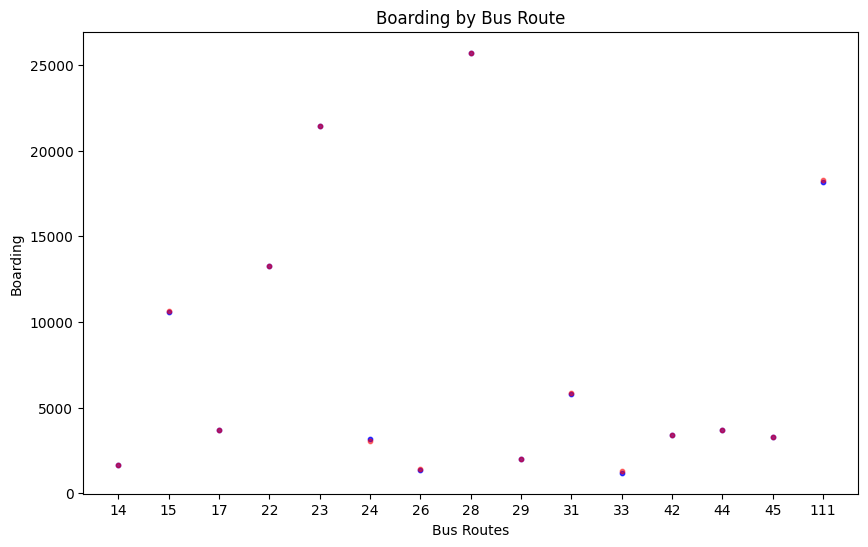

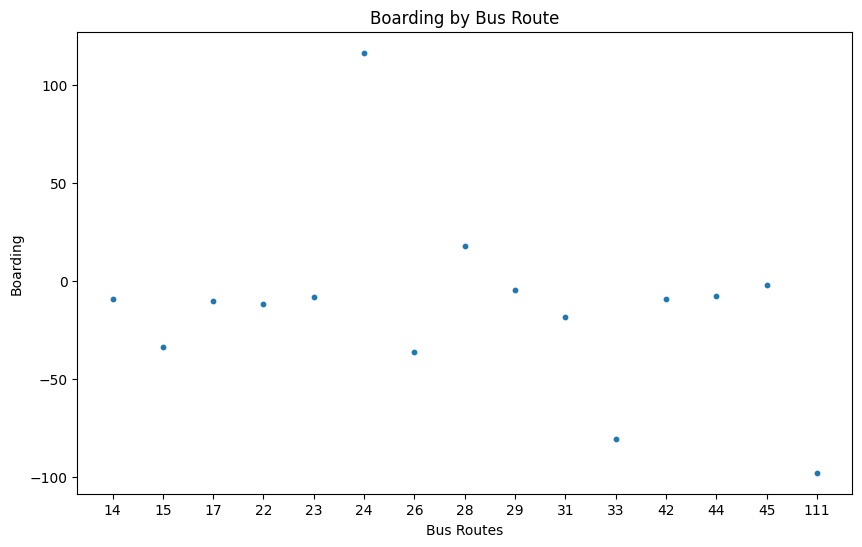

Total ridership is 118485.4. 



(          boardings  alightings  difference
 route_id                                   
 14           1652.7      1661.8        -9.1
 15          10590.7     10624.2       -33.5
 17           3704.3      3714.3       -10.0
 22          13246.3     13258.1       -11.8
 23          21442.6     21450.9        -8.3
 24           3182.4      3065.8       116.6
 26           1368.5      1404.9       -36.4
 28          25712.0     25694.2        17.8
 29           1984.3      1989.1        -4.8
 31           5807.9      5826.1       -18.2
 33           1199.6      1280.5       -80.9
 42           3391.4      3400.6        -9.2
 44           3710.7      3718.4        -7.7
 45           3308.2      3310.0        -1.8
 111         18183.8     18281.7       -97.9,
         route_id trip_start_time                      stop_name  boardings
 23073         14        13:30:00        WARREN ST @ TOWNSEND ST       14.5
 29460         15        15:15:00                 NUBIAN STATION       14.7
 42181

In [186]:
ridership('MBTA_Bus_Ridership_Fall_2022.csv')

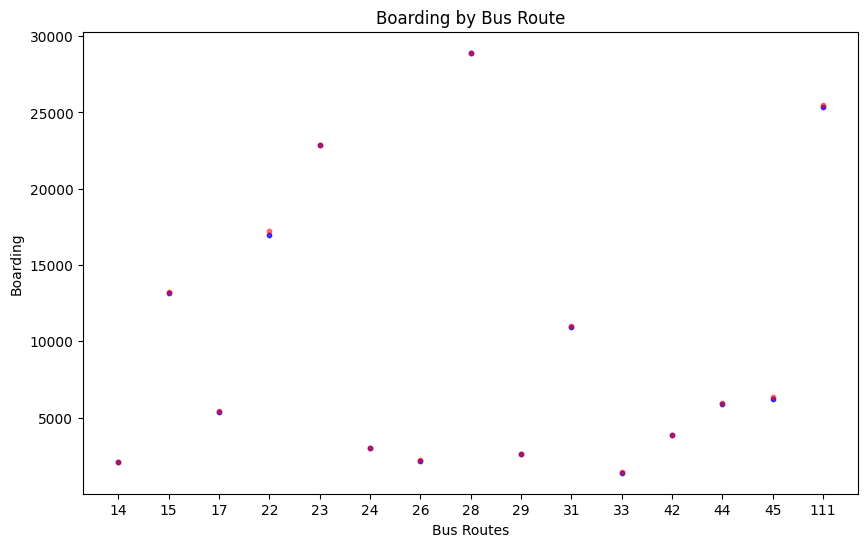

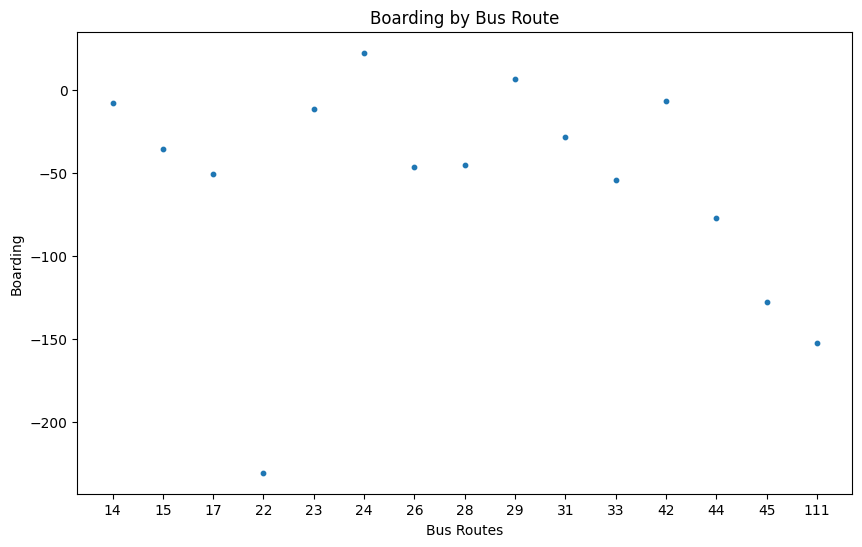

Total ridership is 150847.9745. 



(           boardings  alightings  difference
 route_id                                    
 14         2105.7000   2113.3000      -7.600
 15        13184.4000  13220.0000     -35.600
 17         5366.0000   5416.7000     -50.700
 22        16991.2000  17221.5000    -230.300
 23        22844.4000  22855.7000     -11.300
 24         3043.0000   3020.6000      22.400
 26         2168.6820   2215.0500     -46.368
 28        28869.7925  28915.0925     -45.300
 29         2597.4000   2591.0000       6.400
 31        10968.2000  10996.4000     -28.200
 33         1390.5000   1444.5000     -54.000
 42         3865.8000   3872.5000      -6.700
 44         5899.6000   5976.6000     -77.000
 45         6207.0000   6334.3000    -127.300
 111       25346.3000  25498.3000    -152.000,
         route_id trip_start_time                      stop_name  boardings
 18912         14        15:30:00                 DUDLEY STATION       21.0
 23902         15        14:05:00  MALCOLM X BLVD OPP O'BRYANT H 

In [5]:
ridership('MBTA_Bus_Ridership_Fall_2016.csv')